In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1 align='center'>Ben Prescott, Assignment 2, MSDS422, WI2021</h1>


In [ ]:
!pip install pandas seaborn matplotlib sklearn pickleshare pandas_profiling scipy numpy

In [5]:
import os
import re
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
import seaborn as sns
from pandas_profiling import ProfileReport
from pickleshare import *
from sklearn.base import clone
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split,GridSearchCV, cross_validate
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import skew 

%matplotlib inline
pd.set_option('display.max_columns', None) #Displays all columns for pandas output
sns.set(rc={'figure.figsize':(12,6)}) #Setting seaborn plot size standard

ModuleNotFoundError: No module named 'pandas'

In [3]:
dill.load_session('saved_notebook.db')

# Objective 0 - Data Load, EDA, Transformations

Importing the pickle file into a Pandas dataframe for mild EDA. Mostly using to get a "lay of the land", to explore the data a bit to see what I'm working with, determine the data types and which columns have null values.

In [200]:
#Read pickle file into dataframe.
df = pd.read_pickle('amesDF.pickle')
#Review first 5 rows and data type counts for features.
df.head()
df.dtypes.value_counts()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Cond,Foundation,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Functional,Fireplaces,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Average,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,Typical,CBlock,Good,Gd,BLQ,2,Unf,0,441,1080,GasA,Fair,Y,SBrkr,1656,0,1656,1,0,1,0,3,1,7,Typ,2,Attchd,Fin,2,528,Typical,Partial_Pavement,210,62,0,0,0,0,No_Pool,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Feedr,Norm,OneFam,One_Story,Above_Average,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,CBlock,Typical,No,Rec,6,LwQ,144,270,882,GasA,Typical,Y,SBrkr,896,0,896,0,0,1,0,2,1,5,Typ,0,Attchd,Unf,1,730,Typical,Paved,140,0,0,0,120,0,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,Typical,CBlock,Typical,No,ALQ,1,Unf,0,406,1329,GasA,Typical,Y,SBrkr,1329,0,1329,0,0,1,1,3,1,6,Typ,0,Attchd,Unf,1,312,Typical,Paved,393,36,0,0,0,0,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Average,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Typical,CBlock,Typical,No,ALQ,1,Unf,0,1045,2110,GasA,Excellent,Y,SBrkr,2110,0,2110,1,0,2,1,3,1,8,Typ,2,Attchd,Fin,2,522,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,OneFam,Two_Story,Average,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,PConc,Typical,No,GLQ,3,Unf,0,137,928,GasA,Good,Y,SBrkr,928,701,1629,0,0,2,1,3,1,6,Typ,1,Attchd,Fin,2,482,Typical,Paved,212,34,0,0,0,0,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


object     40
int64      32
float64     2
dtype: int64

In [201]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

One of the tasks of this objective was to remove all records for houses with > 4000 Sq Ft. Prior to doing that I've decided to visualize my target feature (Sale Price) against the main square footage feature. Based on the scatterplot it looks as though there might be 5 records that may be outliers, which will cause issues with later algorithms due to outlier sensitivity. My goal is to also remove those outliers.

I'll also be separating features of 'object' type into a new dataframe, and every other non-object type feature into a separate dataframe. We'll be focusing on the usage of the numeric data moving forward.

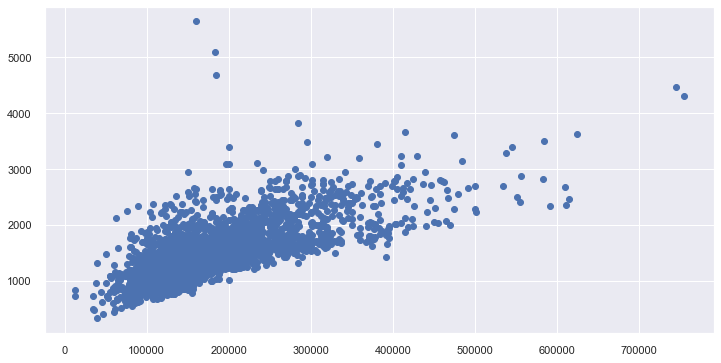

In [9]:
#Visualizing target feature (sale price) vs living area sq footage. Initial view shows 5 potential outliers to remove.
plt.scatter(df['Sale_Price'],df['Gr_Liv_Area'])

In [10]:
#Copying all records with less than or equal to 4000 sq ft (objective states more than 4000) to a new dataframe for later use.
df2 = df[df['Gr_Liv_Area'] <= 4000].copy(deep=True)
#Total count of new records, showing we've removed 5 
print("Observation count of less than 4000 sq ft living area:", len(df2))

#Separating features of 'object' type into new dataframe, as well as every other data type into a separate dataframe.
dfchar, dfnum = df2.select_dtypes(include=['object']).copy(deep=True), df2.select_dtypes(exclude=['object']).copy(deep=True)

Observation count of less than 4000 sq ft living area: 2925


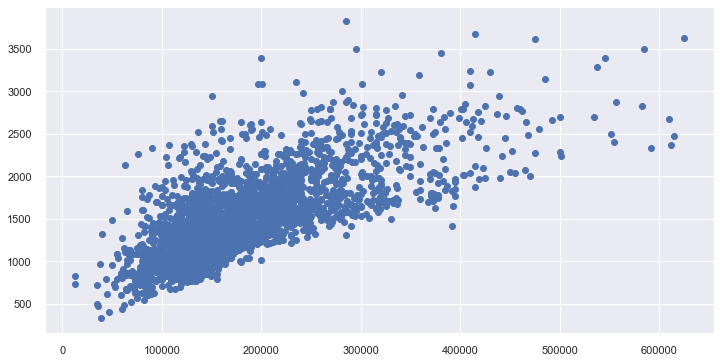

In [11]:
#Reviewing scatterplot of target feature vs sq footage to show outliers were removed.
plt.scatter(df2['Sale_Price'],df2['Gr_Liv_Area'])

In [204]:
#Reviewing new dataframe dtypes/counts to show object type was split out.
dfchar.dtypes.value_counts()
dfnum.dtypes.value_counts()

object    40
dtype: int64

int64      32
float64     2
dtype: int64

Here I'll be using Pandas Profiling to generate a nice graphical report to aid in EDA. This will help in minimizing the amount of code needed and provide many common tasks in a single report that can be easily exported.

There were no missing values found, but many with a heavy skew due to zeros. After reviewing the dataset, zeros are a very real entry and are not made in error, so further action (such as replacing with mean etc.) will not be taken. It may be worth exploring removal of these features in the future.

In [ ]:
profile = ProfileReport(dfnum, title="Ames Housing Dataset Profile")
profile.to_notebook_iframe()

Using other example notebooks for reference/suggestions, it was determined there is a record that shows a house being remodeled before the listed build date. I'll be removing this record from the dataframe to help reduce inaccurate data.

In [12]:
#View initial shape of dataframe.
dfnum.shape
#Finding if any houses are listed as built after being remodeled.
((dfnum.Year_Built-dfnum.Year_Remod_Add)>0.00).value_counts()
#Copying all rows to a new dataframe, excluding the above found row.
dfnum2=dfnum.loc[~((dfnum.Year_Built-dfnum.Year_Remod_Add)>0.00),:].copy(deep=True)
#Reviewing new dataframe shape to validate record was removed.
dfnum2.shape

(2925, 34)

False    2924
True        1
dtype: int64

(2924, 34)

As mentioned earlier, the output of the Pandas Profiling report alluded to many features with a heavy positive skew. Many are due to things such as many houses not having a three season porch, but Lot_Area seems suspicious due to a few extreme outliers above the 100k mark. Considering K-means is sensitive to outliers I'll be removing these observations.

Text(0.5, 0.98, 'Lot Area Extreme Outliers')

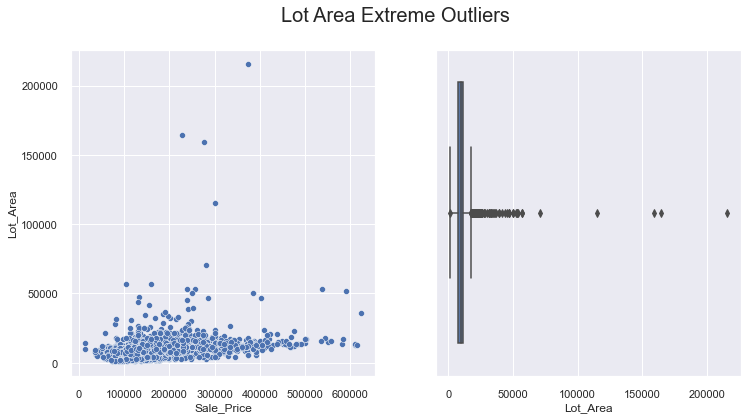

In [13]:
#Create a 1x2 plot
fig, axs = plt.subplots(ncols=2)
#Adding a main title for the subplots
plt.suptitle("Lot Area Extreme Outliers", fontsize=20)
#Plot the target feature (Sale Price) against Lot Area to see if we have additional outliers
sns.scatterplot(x='Sale_Price', y='Lot_Area', data=dfnum2, ax=axs[0])
#Also creating a boxplot to visualize potential outliers of the Lot Area feature
sns.boxplot(x='Lot_Area', data=dfnum2, ax=axs[1])

As mentioned and seen above, there are 4 records that that could be seen as outliers in the Lot Area feature. I'll be removing those and replotting to ensure they are removed. 

(2924, 34)

(2920, 34)

Text(0.5, 0.98, 'Lot Area Extreme Outliers Removed')

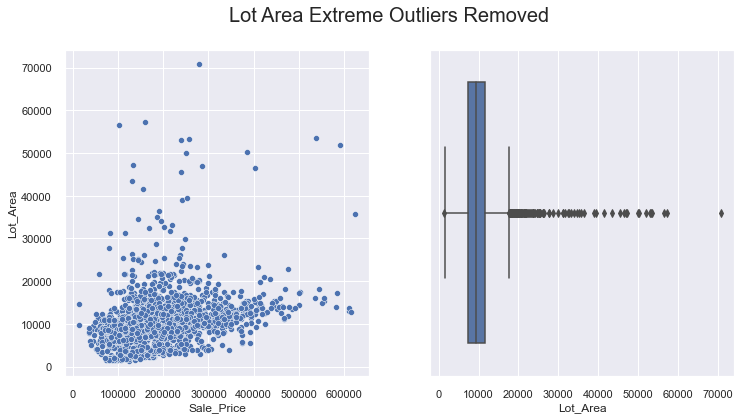

In [14]:
#Review dataframe shape prior to removal
dfnum2.shape
#Remove records with lot area > 100000
dfnum3 = dfnum2[dfnum2['Lot_Area'] <= 100000].copy(deep=True)
#Review new dataframe shape to determine rows removed
dfnum3.shape

#Replotting Sale Price vs Lot Area to visualize removal
fig, axs = plt.subplots(ncols=2)
plt.suptitle("Lot Area Extreme Outliers Removed", fontsize=20)
sns.scatterplot(x='Sale_Price', y='Lot_Area', data=dfnum3, ax=axs[0])
sns.boxplot(x='Lot_Area', data=dfnum3, ax=axs[1])

Referring to the mention of "questionably numeric" features, and some examples in provided notebooks, I'll be adjusting the features with years or months. I'll be doing this as to keep from having the single Month Sold feature with numbers 1-12 and instead have each month represent a binary feature.

In [16]:
#Using the native Pandas get_dummies to convert the feature for month sold into separate columns of 0s and 1s
smodummies = pd.get_dummies(dfnum3['Mo_Sold'],prefix="Sales_Mo").astype(int)
#Reviewing the dummy columns
smodummies.columns
#Adding all features/rows excluding the Month Sold column to a new dataframe
dfnum4 = dfnum3.loc[:,~(dfnum3.columns.isin(['Mo_Sold']))]
#Concatenating the two dataframes together (dfnum4 without Month Sold and the new dummy columns)
dfnum5 = pd.concat([dfnum4,smodummies],axis=1,ignore_index=False)
dfnum5.head()

Index(['Sales_Mo_1', 'Sales_Mo_2', 'Sales_Mo_3', 'Sales_Mo_4', 'Sales_Mo_5',
       'Sales_Mo_6', 'Sales_Mo_7', 'Sales_Mo_8', 'Sales_Mo_9', 'Sales_Mo_10',
       'Sales_Mo_11', 'Sales_Mo_12'],
      dtype='object')

Converting the Year-related feature values to how many years prior to 2010 they occurred. This will help with minimizng the range of values when standardizing later.

In [19]:
#Subtracting 2010 from each value in the three year-related feature
dfnum5years = dfnum5.loc[:,['Year_Built','Year_Remod_Add','Year_Sold']].transform(lambda x: 2010-x)
#Grabbing all rows/features excluding the year-related ones and separated to a new dataframe
dfnum6 = dfnum5.loc[:,~(dfnum5.columns.isin(['Year_Built','Year_Remod_Add','Year_Sold']))]
#Concatenating the two dataframes back together
dfnum7 = pd.concat([dfnum6,dfnum5years],axis=1)

# Objective 1 - K-Means Clusterings

In this section I'll be performing K-means Clustering to determine which houses, based on their features, can be considered "like records" and grouped together into clusters. I'll be evaluating different metrics like the Silhouette Score, Davies Bouldin Score, and Calinski Harabasz Score. The Silhouette Score represents distance between other points and its nearest cluster, the Davies Bouldin Score measures the distance between each the clusters' centroids, and the Calinski Harabasz Score compares the variance between clusters to that of each clusters internal variance.

In [20]:
#Splitting Sale Price into a new dataframe and all other features excluding Sale Price into new dataframe
saledata, clusdata = dfnum7.loc[:,(dfnum7.columns.isin(['Sale_Price']))].copy(deep=True), dfnum7.loc[:,~(dfnum7.columns.isin(['Sale_Price']))].copy(deep=True)
#Defining X and y for training. Converting to NumPy arrays.
X = clusdata.to_numpy(copy=True) 
y = saledata.Sale_Price.to_numpy(copy=True)

In [21]:
#Creating a for loop to train, fit and predict a K-Means model for cluster sizes from 2 - 13
for i in range(2,13):
    #Defining the clusters and random state for repeatability
    clusters = KMeans(n_clusters=i, random_state=44)
    #Fitting the model and predicting labels from X
    labels = clusters.fit_predict(X)
    #Printing the results of each iteration for mentioned metrics
    print("Cluster # =", i,
          f"Silhouette Score: {silhouette_score(X, labels)}",
          f"Davies Bouldin Score: {davies_bouldin_score(X, labels)}",
          f'CH Score: {calinski_harabasz_score(X, labels)}')

Cluster # = 2 Silhouette Score: 0.7596890425207573 Davies Bouldin Score: 0.6135060409995381 CH Score: 2137.7652707642414
Cluster # = 3 Silhouette Score: 0.44068092140725773 Davies Bouldin Score: 0.6810153295064377 CH Score: 3095.83369436093
Cluster # = 4 Silhouette Score: 0.43898709713257017 Davies Bouldin Score: 0.6609269910067859 CH Score: 3766.0838919190173
Cluster # = 5 Silhouette Score: 0.4261086495071589 Davies Bouldin Score: 0.6715196323838235 CH Score: 4171.011762159904
Cluster # = 6 Silhouette Score: 0.38434911330844795 Davies Bouldin Score: 0.7089775898854423 CH Score: 4398.412016066107
Cluster # = 7 Silhouette Score: 0.37285486505761395 Davies Bouldin Score: 0.7075606866901936 CH Score: 4467.637553967823
Cluster # = 8 Silhouette Score: 0.34489017665400656 Davies Bouldin Score: 0.7612934296933396 CH Score: 4542.201364377202
Cluster # = 9 Silhouette Score: 0.30902785493284374 Davies Bouldin Score: 0.8300642080091515 CH Score: 4463.575069416142
Cluster # = 10 Silhouette Score: 

Based on the output of the for loop I'll be using 4 clusters. My reasoning is that while 2 clusters has a much higher silhouette score, I feel that the CH score was also the lowest and did not provide enough distinction for the number of features. Anything above two clusters had a sharp drop in Silhouette Score, with 4 having a lower DB Score than 3 and a higher CH score than 3.

In [25]:
#Creating Kmeans with 4 clusters
clusters = KMeans(n_clusters=4, random_state=40)
#Fitting and predicting labels
labels = clusters.fit_predict(X)
#Determining the clusters' centers
centers = clusters.cluster_centers_
#Outputting the Silhouette Score
silhouette_avg = silhouette_score(X, labels)
#Creating silhouette values to plot in the next section
sample_silhouette_values = silhouette_samples(X, cluster_labels)

I'll be using some snippets of code from the SKlearn documentation to generate a Silhouette Plot and scatter plot distinguishing the different clusters and their respective centroids. The silhouette plot also verifies that 4 clusters is a good option.

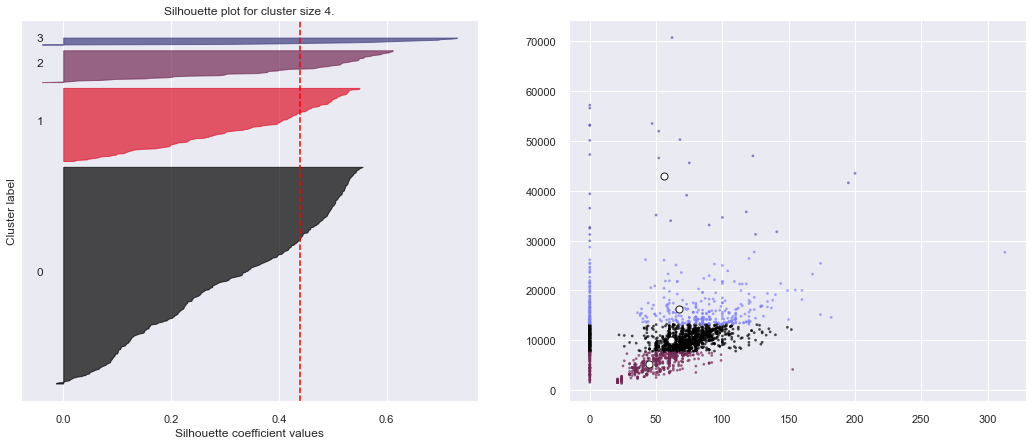

In [26]:
#Setting up a 1x2 subplot 
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_title("Silhouette plot for cluster size 4.")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
#Creating a horizontal line to draw where the silhouette score lands
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
y_lower = 10

#Creating a for loop to generate the Silhouette Plot
for i in range(clusters.n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.gist_stern(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

colors = cm.gist_stern(labels.astype(float) / 6)

#creating scatter plots to find the clusters and their centers
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=50, edgecolor='k')
plt.show();

# Objective 2: Rescaling Feature Data

In this objective I'll be rescaling the data. I chose to go with standardization and not min-max scaling. I'll split both X and y into train/test splits using the training size of 85% and test size of 15%.

In [32]:
#Determining X and y shape to ensure it can be split
X.shape
y.shape

#Train/test split with 85% training and 15% test/validation
trainX , testX , trainy , testy = train_test_split(X, y, train_size = 0.85, test_size=0.15, random_state=33)

(2920, 44)

(2920,)

In [33]:
#Loading standardization algorithm
scaler = StandardScaler()
#Fitting the training data to the algorithm
scaler.fit(trainX)
#Assigning the scaled trainX to a new variable named trainXS
trainXS = scaler.transform(trainX)
trainXS
#Assigning the scaled testX to a new variable named testXS
testXS = scaler.transform(testX)
testXS

StandardScaler()

array([[-1.7328052 , -0.47054304,  0.21738288, ..., -0.02735038,
        -0.95617686,  0.6015238 ],
       [ 0.22773525, -0.66803529, -0.57066485, ...,  1.06594404,
         1.64151383,  1.35899821],
       [ 0.46903254, -0.22524891, -0.57066485, ..., -1.15377494,
        -1.05238763,  1.35899821],
       ...,
       [-1.7328052 ,  0.00918981, -0.57066485, ..., -0.15987092,
        -0.42701765, -0.91342502],
       [ 0.55951902,  0.00461912, -0.57066485, ..., -0.95499413,
        -0.76375533,  0.6015238 ],
       [ 0.77065415,  0.01452229,  1.6964    , ..., -0.78934346,
        -0.52322842,  1.35899821]])

array([[ 0.61984334,  1.07740005,  1.8848462 , ...,  0.70151257,
        -0.33080688, -1.67089943],
       [-0.22469716, -0.52101117, -0.57066485, ...,  0.4364715 ,
        -1.1485984 , -1.67089943],
       [ 0.89130279,  0.01090383,  0.91977325, ...,  0.30395096,
         1.06424923, -1.67089943],
       ...,
       [-1.7328052 , -0.66536905, -0.57066485, ...,  2.12610833,
         1.64151383, -1.67089943],
       [ 0.07692445, -0.52234429, -0.57066485, ...,  0.66838243,
         1.59340845, -0.15595061],
       [ 0.13724877, -0.32351892, -0.57066485, ..., -1.08751467,
        -0.95617686,  0.6015238 ]])

# Objective 3: PCA

In [34]:
#Loading PCA algorithm and assigning 75% of total variance
pca75 = PCA(n_components=0.75, svd_solver='full')
#Fitting the training data
pca75.fit(trainX)
print("Number of components required for 75% of total variation:", pca75.components_.size)

PCA(n_components=0.75, svd_solver='full')

Number of components required for 75% of total variation: 44


In [35]:
#Assigning the PCA-transformed training data to new variable trainXPCA
trainXPCA=pca75.transform(trainX)
#Assigning the PCA-transformed test data to new variable testXPCA
testXPCA=pca75.transform(testX)
trainXPCA.shape

(2482, 1)

# Objective 4: Training RF Regressors

Now that I have ran PCA for dimensionality reduction I'll be using Random Forest Regressors to predict Sale Price. I'll also be looking at what the regressor's feature importance scores are. The higher the feature importance the more important the feature in predicting the Sale Price.

In [46]:
#Load RF Regressor. Set # of estimators to 100 and including out of bag data
rfreg = RandomForestRegressor(n_estimators=100, max_features="auto", oob_score=True)
#Fit training data
rfreg.fit(trainX, trainy)
#Predict Sale Price using testX
ypred = rfreg.predict(testX)

RandomForestRegressor(oob_score=True)

Feature importances, with the higher the score the more important. All values add up to 1. 

We can see that the main living area sq footage, how many cars the garage can fit, and the year built are all very important features.

In [47]:
#Reviewing feature importances
pd.DataFrame([rfreg.feature_importances_], columns=clusdata.columns)

,Lot_Frontage,Lot_Area,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Longitude,Latitude,Sales_Mo_1,Sales_Mo_2,Sales_Mo_3,Sales_Mo_4,Sales_Mo_5,Sales_Mo_6,Sales_Mo_7,Sales_Mo_8,Sales_Mo_9,Sales_Mo_10,Sales_Mo_11,Sales_Mo_12,Year_Built,Year_Remod_Add,Year_Sold
0,0.005182,0.019594,0.024637,0.003464,0.000629,0.010017,0.071212,0.0591,0.006122,0.162003,0.003656,0.000239,0.003272,0.001299,0.004662,0.002072,0.00444,0.026665,0.267141,0.025617,0.005323,0.005702,0.001197,0.000083,0.002909,0.000069,0.000266,0.009531,0.010687,0.000371,0.001395,0.000475,0.000285,0.000356,0.000643,0.00045,0.000266,0.000482,0.000788,0.000482,0.000365,0.226115,0.028397,0.002339


In [48]:
#Viewing a dataframe of predicted values to actual Sale Price values
pd.DataFrame({'Pred':ypred, 'Actual':testy}, columns=['Pred','Actual'])

,Pred,Actual
0,175964.17,215000
1,116833.32,116500
2,144653.35,160000
3,232433.93,239500
4,241282.17,218836
...,...,...
433,141746.50,133000
434,445938.81,342000
435,125666.93,93369
436,118254.15,94000


In [49]:
#Reviewing the RMSE for the predicted values against actuals. RMSE is about $23,720
mse = mean_squared_error(testy,ypred)
rmse = np.sqrt(mse)
rmse

23720.704943738805

Training using trainXS and predicting using testXS.

In [50]:
rfreg = RandomForestRegressor(n_estimators=100, max_features="auto", oob_score=True)
rfreg.fit(trainXS, trainy)
ypred = rfreg.predict(testXS)

RandomForestRegressor(oob_score=True)

In [51]:
pd.DataFrame([rfreg.feature_importances_], columns=clusdata.columns)

,Lot_Frontage,Lot_Area,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Longitude,Latitude,Sales_Mo_1,Sales_Mo_2,Sales_Mo_3,Sales_Mo_4,Sales_Mo_5,Sales_Mo_6,Sales_Mo_7,Sales_Mo_8,Sales_Mo_9,Sales_Mo_10,Sales_Mo_11,Sales_Mo_12,Year_Built,Year_Remod_Add,Year_Sold
0,0.00484,0.021024,0.024218,0.003159,0.000738,0.010086,0.076655,0.06266,0.007316,0.163951,0.003201,0.000359,0.002023,0.001209,0.004852,0.001879,0.005427,0.027383,0.265153,0.021126,0.005713,0.005775,0.000925,0.000068,0.002309,0.000102,0.000303,0.008966,0.010794,0.000306,0.001008,0.0004,0.000277,0.000357,0.000638,0.00058,0.000376,0.000513,0.000711,0.000684,0.000372,0.220519,0.0287,0.002344


In [52]:
pd.DataFrame({'Pred':ypred, 'Actual':testy}, columns=['Pred','Actual'])

,Pred,Actual
0,186175.04,215000
1,113686.16,116500
2,142613.68,160000
3,229300.80,239500
4,240405.15,218836
...,...,...
433,141074.57,133000
434,436125.10,342000
435,126485.43,93369
436,117401.92,94000


In [54]:
#Noticing a RMSE of $23,779. Very similar to original train/test data.
mse = mean_squared_error(testy,ypred)
rmse = np.sqrt(mse)
rmse

23779.720216458638

Changing number of trees to 200 and max features to log2. RMSE continues to drop with refinement.

In [55]:
#Using more estimators and using the max features of log2, still using out of bag. 
rfreg = RandomForestRegressor(n_estimators=200, max_features="log2", oob_score=True)
rfreg.fit(trainXS, trainy)
ypred = rfreg.predict(testXS)

RandomForestRegressor(max_features='log2', n_estimators=200, oob_score=True)

In [56]:
out = pd.DataFrame({'Pred':ypred, 'Actual':testy}, columns=['Pred','Actual'])

In [59]:
#Viewing summary stats for predicted and actuals
out.describe()

,Pred,Actual
count,438.000000,438.000000
mean,180327.270765,179918.945205
std,70871.418534,79048.640115
min,66654.175000,34900.000000
25%,130881.661250,129000.000000
50%,160413.527500,159450.000000
75%,211439.476250,213750.000000
max,470928.320000,591587.000000


In [60]:
#RMSE for more estimators still using trainXS and testXS decreases 
mse = mean_squared_error(testy,ypred)
rmse = np.sqrt(mse)
rmse

23396.08608433703

# Objective 5: Boosted Regression Models

In this section I'll be using AdaBoost to create an iterative, sequential model to refine the output as much as possible. I'll be running a quick GridSearch to determine the best number of learners and the learning rate based on my given range in parameters.  

In [61]:
#Hyperparameters to test in grid search
parms = {'n_estimators': [50,100,150,200],'learning_rate':[.25,.50,.75,1]}
#Loading AdaBoost algorithm
adaregr = AdaBoostRegressor()
#Running GridSearchCV against adaboost using parameters
adaParmCV = GridSearchCV(adaregr,parms)
adaParmCV

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.25, 0.5, 0.75, 1],
                         'n_estimators': [50, 100, 150, 200]})

In [62]:
#Fitting my trainX and trainy data to the GridSearch algorithm
adaParmFit = adaParmCV.fit(trainX,trainy)
#Determining the best learning rate and number of estimators for the given data
adaParmFit.best_params_

{'learning_rate': 0.25, 'n_estimators': 100}

GridSearchCV determined the best number of estimators is 100 and the learning rate should be .25. I'll be using these values for the AdaBoost Regressor hyperparameters.

In [72]:
#Load the AdaBoost algorithm with the GridSearchCV recommended values
adaregr = AdaBoostRegressor(n_estimators=100,learning_rate=.25)
#Cross validation of the algorithm using trainX and trainy. 10 cross validation iterations and returning r2 and RMSE
adakfold = cross_validate(clone(adaregr),trainX, trainy, cv=10, return_train_score=True,
                       scoring=('r2', 'neg_root_mean_squared_error'))

In [73]:
#Printing summary stats for the cross validation output 
print('Fold summary stats:')
pd.DataFrame(adakfold).iloc[:,2:].describe()

Fold summary stats:


,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
count,10.000000,10.000000,10.000000,10.000000
mean,0.810973,0.852484,-33624.739851,-30101.807793
std,0.038534,0.002237,2352.203909,366.113941
min,0.747460,0.847418,-38017.476092,-30711.020415
25%,0.795085,0.851954,-34614.504395,-30375.387373
50%,0.817322,0.852972,-33817.072756,-29993.324249
75%,0.835465,0.854033,-32730.375912,-29913.085240
max,0.857454,0.854876,-28753.418266,-29443.755759


Fitting and training the initial adaregr model.

In [76]:
#Loading AdaBoost Regressor with recommended hyperparameter values
adaregr = AdaBoostRegressor(n_estimators=100,learning_rate=.25)
#Fit using trainX and trainy
adaregr.fit(trainX,trainy)
#Predict Sale Price using testX
ypred = adaregr.predict(testX)

AdaBoostRegressor(learning_rate=0.25, n_estimators=100)

In [77]:
#AdaBoost score
adaregr.score(trainX,trainy)

0.8486621661330779

The feature importances also show that the basement sq footage is important as well as living area sq footage, garage car stalls and year built.

In [78]:
#Loading feature importances into a dataframe
pd.DataFrame([adaregr.feature_importances_], columns=clusdata.columns)

,Lot_Frontage,Lot_Area,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Longitude,Latitude,Sales_Mo_1,Sales_Mo_2,Sales_Mo_3,Sales_Mo_4,Sales_Mo_5,Sales_Mo_6,Sales_Mo_7,Sales_Mo_8,Sales_Mo_9,Sales_Mo_10,Sales_Mo_11,Sales_Mo_12,Year_Built,Year_Remod_Add,Year_Sold
0,0.014194,0.021682,0.035817,0.001644,0.0,0.010549,0.135548,0.083876,0.00879,0.298027,0.002436,0.0,0.0,0.003281,0.0,0.0,0.005068,0.016547,0.136643,0.004454,0.009059,0.002598,0.0,0.0,0.001489,0.0,0.0,0.012379,0.025868,0.0,0.000899,0.0,0.0,0.0,0.001047,0.0,0.0,0.0,0.0,0.0,0.0,0.131271,0.036729,0.000106


In [79]:
#Reviewing actuals vs predicted
pd.DataFrame({'Pred':ypred, 'Actual':testy}, columns=['Pred','Actual'])

,Pred,Actual
0,187916.708464,215000
1,120660.867081,116500
2,120971.784797,160000
3,223912.257919,239500
4,240821.320823,218836
...,...,...
433,138558.669951,133000
434,462580.080000,342000
435,164516.624214,93369
436,116878.669903,94000


I'll now be fitting the AdaBoost regressor using the PCA data.

In [80]:
adaregr = AdaBoostRegressor(n_estimators=100,learning_rate=.25)
adaregr.fit(trainXPCA,trainy)
ypred = adaregr.predict(testXPCA)

AdaBoostRegressor(learning_rate=0.25, n_estimators=100)

Reviewing the score using the PCA data seems to have a sharp decrease in mean accuracy in comparison to the regular trainX and trainy data.

In [81]:
adaregr.score(trainXPCA,trainy)

0.1162536069599186

In [83]:
pd.DataFrame({'Pred':ypred, 'Actual':testy}, columns=['Pred','Actual'])

,Pred,Actual
0,307013.791246,215000
1,161504.105906,116500
2,196427.472316,160000
3,188634.984300,239500
4,204023.507645,218836
...,...,...
433,161504.105906,133000
434,274897.803670,342000
435,161504.105906,93369
436,161504.105906,94000


In [84]:
#Dumping all variables and session information using Dill
dill.dump_session('saved_notebook.db')